# Borrower reliability survey


The customer is the credit department of a bank. We need to understand whether the marital status and the number of children of the client affects the fact of repayment of the loan on time. Input data from the bank - statistics on the solvency of clients.
The results of the research will be taken into account when building a credit scoring model - a special system that assesses the ability of a potential borrower to repay a loan to the bank.

Data description
- `children` - number of children in the family
- `days_employed` - total length of service in days
- `dob_years` - client's age in years
- `education` - education level of the client
- `education_id` - education level identifier
- `family_status` - marital status
- `family_status_id` - family status identifier
- `gender` - client's gender
- `income_type` - type of employment
- `debt` - whether the client had debts on loan repayment
- `total_income` - monthly income
- `purpose` - purpose of obtaining a loan

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Data preprocessing

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Cleaning outliers

In [6]:
data['days_employed'] = data['days_employed'].abs()

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

Two types (unemployed and pensioners) will have abnormally large values. It is difficult to correct such values, so we'll leave them as they are. Moreover, we will not need this column for the study.

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Changing data types

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Duplicate processing

In [14]:
data.duplicated().sum()

54

In [15]:
data = data.drop_duplicates()

In [16]:
data['education'] = data['education'].str.lower()

### Data categorization

Based on the ranges below, we'll create a `total_income_category` column in the `data` dataframe with the categories:**

- 0-30000 - `'E'`;
- 30001-50000 - `'D'`;
- 50001-200000 - `'C'`;
- 200001-1000000 - `'B'`;
- 1000001 and above - `'A'`.


**For example, a borrower with an income of 25000 should be assigned to category `'E'`, and a client earning 235000 should be assigned to category `'B'`. Use your own function named `categorize_income()` and the `apply()` method.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

We'll create a function that will generate a new `purpose_category` column based on the data from the `purpose` column, which will include the following categories:**

- `'операции с автомобилем'` - - ``automobile transactions'``,
- `'операции с недвижимостью'` - - ``real estate transactions``,
- `'проведение свадьбы'` - - ``conducting weddings,``,
- `'получение образования'` - -`"education'`

**For example, if the `purpose` column contains a ``car purchase`` substring, then the `purpose_category` column should contain the ``automobile transactions`` string.

**Use your own function named `categorize_purpose()` and the `apply()` method. We'll examine the data in the `purpose` column and determine which substrings will help properly define the category.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

## Explore the data

**Is there a correlation between the number of children and loan repayment on time?**

In [35]:
# тренировка сводных таблиц

pd.pivot_table(data,index='children', values='debt',aggfunc='mean')

,debt
children,
0,0.075353
1,0.092327
2,0.094542
3,0.081818
4,0.097561
5,0.000000


In [24]:
# create a function to calculate the percentage of clients with debt to the total number of clients

def proportion(data,column):
    '''
    As input, we take a dataframe and a column name.
    create two dictionaries to count clients with debt and total number of clients --
    grouping by input column.
    output is a dataframe with the input column and a "percentage" column with a percentage ratio.
    '''
    debts = {}
    total = {}
    for t in data[column].unique():
        if t not in debts and t not in total:
            debts[t] = data.loc[(data[column] == t) & (data['debt']==1),'debt'].count()
            total[t] = data.loc[data[column] == t,column].count()
        
    proportion = {i: (debts[i]/total[i])*100 for i in debts}
    final = pd.DataFrame(list(proportion.items()), columns=[column, 'percentage'])
    return final


[Text(0.5, 0, 'Процент задолженностей'), Text(0, 0.5, 'Количество детей')]

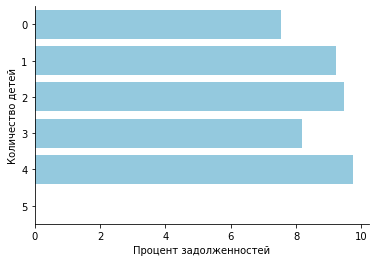

In [25]:
children_final = proportion(data,'children')
children_final['children'] = children_final['children'].astype('category')
import seaborn as sns
a = sns.barplot(x='percentage', y='children', data=children_final, color='skyblue')
sns.despine()
a.set(xlabel='Процент задолженностей', ylabel='Количество детей')

**Findings:** 
* The difference between the lowest and highest rate is ~3%, there is a dim correlation.
* Fewer clients with debt among childless, more among clients with 4 children. 

**Is there a correlation between marital status and loan repayment on time?**

In [26]:

grouped_families = data.groupby(['family_status','debt']).agg({'debt':'count'})
grouped_families.unstack()


debt     
debt                       0    1
family_status                    
Не женат / не замужем   2523  273
в разводе               1105   84
вдовец / вдова           888   63
гражданский брак        3761  385
женат / замужем        11339  927

[Text(0.5, 0, 'Процент задолженностей'), Text(0, 0.5, '')]

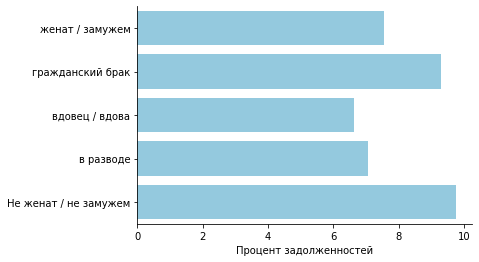

In [27]:
fam_final = proportion(data,'family_status')
q = sns.barplot(x='percentage', y='family_status', data=fam_final, color='skyblue')
sns.despine()
q.set(xlabel='Процент задолженностей', ylabel='')


**Conclusion:** 
* People living in common-law relationships or not married at all have more credit debts.
* Among widows/widowers, there is less debt.
* The difference between the lowest and highest score is ~4%, the relationship is more pronounced than between marital status 

**Is there a correlation between income level and loan repayment on time?**

In [28]:

grouped_income_category = data.groupby(['total_income_category','debt']).agg({'debt':'count'})
grouped_income_category.unstack()

debt      
debt                       0     1
total_income_category             
A                         23     2
B                       4660   354
C                      14585  1353
D                        328    21
E                         20     2

[Text(0.5, 0, 'Процент задолженностей'), Text(0, 0.5, '')]

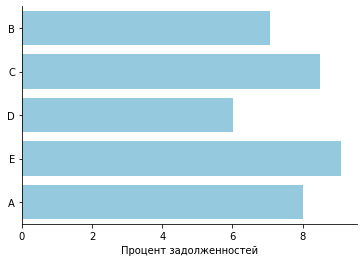

In [29]:
income_final = proportion(data,'total_income_category')

p = sns.barplot(x='percentage', y='total_income_category', data=income_final, color='skyblue')
sns.despine()
p.set(xlabel='Процент задолженностей', ylabel='')


**Conclusion:** 
* The least amount of credit debt among clients with incomes between 30001 and 50000.
* The most among clients with incomes below 30000 *
* The difference between these indicators is about ~4%, the correlation is more pronounced than that between marital status

**How do the different purposes of a loan affect its repayment at maturity?**

In [30]:

purpose_groupped = data.groupby(['purpose_category','debt']).agg({'debt':'count'})
purpose_groupped.unstack()


debt     
debt                         0    1
purpose_category                   
операции с автомобилем    3881  400
операции с недвижимостью  9974  780
получение образования     3620  369
проведение свадьбы        2141  183

[Text(0.5, 0, 'Процент задолженностей'), Text(0, 0.5, '')]

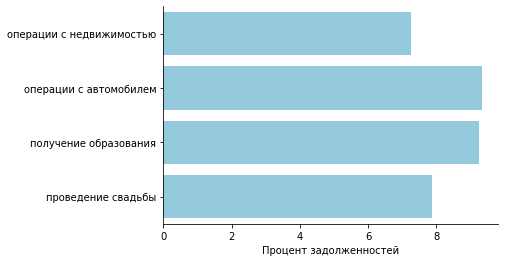

In [31]:
purpose_final = proportion(data,'purpose_category')

w = sns.barplot(x='percentage', y='purpose_category', data=purpose_final, color='skyblue')
sns.despine()
w.set(xlabel='Процент задолженностей', ylabel='')

**Conclusion:**
* Customers with the goals of "automobile operations" and "education" have more debts on loans
* The difference between the lowest and the highest indicator does not exceed 3%, the dependence is not so tangible. 

**possible reasons for omissions in the raw data.**

**Answer:** 
* Hypothesis 1: **missing data is non-random**, customer refused to provide data. Data is missing only in the days_employed and total_income columns. The number of empty cells is one.
* Hypothesis 2: **missing is random**, caused by a technical failure. To test the hypothesis, we need to request technical data - the time the row was entered into the database and the source id.

Since the second hypothesis cannot be tested in this analysis, we will stick to hypothesis 1.

## Overall conclusion.

As a result of the study, we found that there is a more tangible correlation between:

* income level and loan repayment on time: clients with income level less than 30000 are more likely to delay loan payments
* marital status and loan repayment on time: unmarried/ single people are more likely to delay loan payments.

Categories with high percentage of arrears (~10%):
* Customers with 4 children
* Unmarried/unmarried
* Income category less than 30000
* Goals: education and automobile transactions

Categories with lower percentage of arrears:
* Childless
* Widows/widowers
* Yield 30001 to 50000
* Purpose: real estate transactions

When deciding whether to approve a loan, you should focus on information about **income level** and **family status**.